In [1]:
import sys
!{sys.executable} -m pip install astropy
!{sys.executable} -m pip install sep
import numpy as np
import sep

downloads neccesary packages and makes sure that they are initialized by python

In [2]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

imports the rest of the neccesary packages and running configuration parameters

In [3]:
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

gets the data out of image.fits to analyze with the following functions

In [4]:
data = data.byteswap().newbyteorder()
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray',vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("f105wfitsfilep1.png");

fits from astropy wants to look at the data in a decending order so we have to swap the bit order for it to look at the data like fitsio would
sets m equal to the numpy function for mean
sets s equal to the numpy function for standard deviation
shows the image with given parameters and outputs a bar next to it with the given range
its not showing an output in the code unless I save it so  i had to save it as a png

In [6]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

had to run byteswap again to prevent an error
setting a variable for the background

In [7]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


prints the total mean of the background value and the noise of the background value

In [8]:
bkg_image = bkg.back()

looks at the background as a 2d array

In [9]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("f105wfitsfilep2.png")

shows the background

In [10]:
bkg_rms = bkg.rms()

looks at the backgtound noise as a 2d array

In [11]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("f105wfitsfilep3.png")

shows the background noise

In [12]:
data_sub = data - bkg

subtracts the background from the image as a whole

In [13]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

setting the noise threshold to mark anything above 1.5

In [14]:
len(objects)

8640

Shows how many objects were detected

In [15]:
from matplotlib.patches import Ellipse


fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')


for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("f105wfitsfilep4.png")

the function at the top plots the image with no background and the second function surrounds each of the identified objects with an ellipse

In [16]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

shows the number of available fields

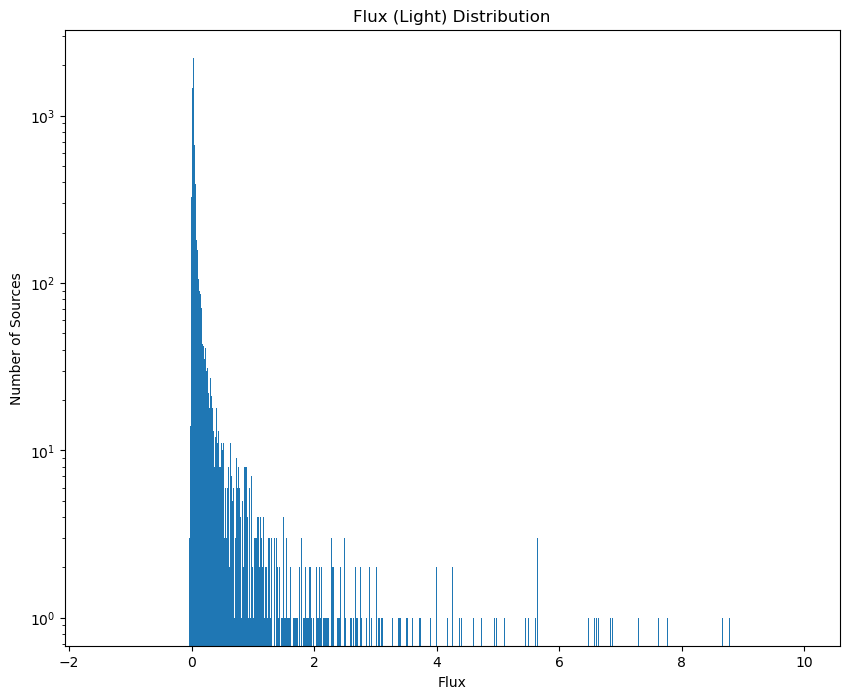

In [18]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
plt.hist(flux, range = [-1.5,10], bins=1000, log=True)
plt.title('Flux (Light) Distribution')
plt.xlabel('Flux')
plt.ylabel('Number of Sources')
plt.savefig("flux_histogram.png")
plt.show()

checks how much light is coming from each object based on light, errors in the light, and accounting for noise
also created a Histogram to show the distribution of flux in the image

In [23]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


Shows the results of the first ten objects

In [25]:
flux_mean = np.mean(flux)
flux_median = np.median(flux)
flux_std = np.std(flux)
flux_max = np.max(flux)
outlier_std = (flux_max - flux_mean) / flux_std

print(f"The Mean of Flux is: {flux_mean}, The Median of Flux is: {flux_median}, The Std Dev of Flux is: {flux_std}")
print(f"The Largest Outlier of Flux is: {flux_max} and is {outlier_std} standard deviations away from the mean.")

The Mean of Flux is: 0.36185728037707154, The Median of Flux is: 0.030960064365426664, The Std Dev of Flux is: 9.243528029706706
The Largest Outlier of Flux is: 807.2972835731507 and is 87.29734184820526 standard deviations away from the mean.


In [26]:
f105 = data
f125 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f160 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

In [27]:
median_f105 = np.nanmedian(f105[f105<1])
median_f125 = np.nanmedian(f125[f125<1])
median_f160 = np.nanmedian(f160[f160<1])
print(f" The median of F105 sky is: {median_f105}")
print(f" The median of F125 sky is: {median_f125}")
print(f" The median of F160 sky is: {median_f160}")

 The median of F105 sky is: 0.0
 The median of F125 sky is: 0.0
 The median of F160 sky is: 0.0


In [28]:
data = data.byteswap().newbyteorder()
f125 = f125.byteswap().newbyteorder()
f160 = f160.byteswap().newbyteorder()
bkg_f125 = sep.Background(f125)
bkg_f160 = sep.Background(f160)
f125 -=bkg_f125
f160 -=bkg_f160
f105 = data_sub

In [29]:
median_f105 = np.nanmedian(f105[f105<1])
median_f125 = np.nanmedian(f125[f125<1])
median_f160 = np.nanmedian(f160[f160<1])
print(f" The median of F105 sky is: {median_f105}")
print(f" The median of F125 sky is: {median_f125}")
print(f" The median of F160 sky is: {median_f160}")

 The median of F105 sky is: 1.293391096651404e-22
 The median of F125 sky is: 7.127440320205985e-22
 The median of F160 sky is: 2.268324725663603e-21


In [30]:
def rescale_data(data, dmin=0.01, dmax=10.0):
    datac = np.clip(data,dmin,dmax)
    return (np.log10(datac)-np.log10(dmin))/(np.log10(dmax)-np.log10(dmin))

In [31]:
p_f105 = rescale_data(f105)
p_f125 = rescale_data(f125)
p_f160 = rescale_data(f160)

In [40]:
rgb = np.stack([p_f160,0.7*p_f125,p_f105],axis=-1)
print(rgb.shape)
print(f"RGB array min: {rgb.min()}, max: {rgb.max()}, dtype: {rgb.dtype}")

(3600, 3600, 3)
RGB array min: 0.0, max: 1.0, dtype: float32


In [38]:
xsize = rgb.shape[1]
ysize = rgb.shape[0]
f,ax = plt.subplots(1,1,figsize=(xsize/1000.0,ysize/1000.0))
ax.axis('off')
ax.imshow(rgb,origin='lower')
plt.imsave('rgb_image.png', rgb, origin='lower')